<a href="https://colab.research.google.com/github/Trantracy/Flavors_of_cacao/blob/master/Data_Manipulation_Working_with_Geo_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Data Manipulation - Working with Geo Data

In [0]:
# Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Read the dataset
df = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Data/flavors_of_cacao.csv')

## Overview of the dataset

In [0]:
# Show 10 random rows
# Your code here
df.sample(10)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
135,Artisan du Chocolat,Dominican Republic,363,2009,72%,U.K.,3.25,Trinitario,Dominican Republic
1111,Michel Cluizel,"Chiapas, Mokaya P.",963,2012,66%,France,3.75,,Mexico
590,Duffy's,Panama,516,2010,70%,U.K.,3.50,,Panama
64,Amatller (Simon Coll),Ecuador,327,2009,70%,Spain,2.75,,Ecuador
520,De Mendes,"Selvagem, Jari",1462,2015,65%,Brazil,3.50,,Brazil
282,Cacao Atlanta,Dominican Republic w/ nibs,502,2010,75%,U.S.A.,2.75,,Dominican Republic
1520,Soma,"Espiritu Santo, 'Smoke Monster'",1307,2014,70%,Canada,3.75,Forastero (Amelonado),Vanuatu
1776,Zokoko,Tokiala,701,2011,66%,Australia,3.50,Trinitario,Papua New Guinea
1058,Marou,Lam Dong,955,2012,74%,Vietnam,3.50,Trinitario,Vietnam
608,El Ceibo,"Alto Beni, Covendo Region",709,2011,75%,Bolivia,3.75,,Bolivia


In [0]:
# Show the summary of the dataset
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


## Data Pre-processing

In [0]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [0]:
# Rename columns
df.columns = ['Maker','BarName','REF','ReviewDate','CocoaPercentage','Country','Rating','BeanType','BeanOrigin']

### Duplicated Data

In [0]:
# Check for duplicated data
# Your code here
df[df.duplicated()]

,Maker,BarName,REF,ReviewDate,CocoaPercentage,Country,Rating,BeanType,BeanOrigin


### Missing Data

In [0]:
# Count all missing values in each column
# Your code here
df.isnull().sum()

Maker              0
BarName            0
REF                0
ReviewDate         0
CocoaPercentage    0
Country            0
Rating             0
BeanType           1
BeanOrigin         1
dtype: int64

In [0]:
# The dataset description suggests that BeanOrigin could be used as products' name. Hence it is safe to replace the missing value in BeanOrigin with Madagascar
# Your code here
df['BeanOrigin'].fillna('Madagascar', inplace = True)

In [0]:
# There's no indicator on the dataset what the missing data in BeanType might be, so let's drop it
# Your code here
df.dropna(inplace = True)


### Mislabeled Data

In [0]:
# Change the datatype format of CocoaPercentage to float (e.g. 50% -> 0.5)
# Your code here
def tran(s):
    s = s.strip('%')
    s = float(s) / 100
    return s

df['CocoaPercentage'].apply(tran)

0       0.63
1       0.70
2       0.70
3       0.70
4       0.70
        ... 
1790    0.70
1791    0.65
1792    0.65
1793    0.62
1794    0.65
Name: CocoaPercentage, Length: 1794, dtype: float64

In [0]:
df['CocoaPercentage'] = df['CocoaPercentage'].str.strip('%').astype(float) / 100

In [0]:
# There is a weird value BeanType. Which one is it?
# Your code here
df['BeanType'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Beniano                       3
Nacional (Arriba)             3
Matina                        3
Amazon mix                    2
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Criollo (Amarru)              2
Criollo, Forastero            2
Nacional                      2
Forastero (Catongo)           2
Amazon, ICS                   2
Trinitario (85% Criollo)      2
Forastero, Trinitario         1
Criollo (Ocumare 67)          1
Criollo (Ocumare)             1
Trinitario, Nacional          1
Forastero (Amelonado)         1
CCN51                         1
Criollo 

In [0]:
# There are a lot of them, so let's replace then with 'No Record'
# Your code here
df['BeanType'] = df['BeanType'].str.replace('\xa0','No Record')

In [0]:
# Replace misspelled countries
# Niacragua -> Nicaragua, Eucador -> Ecuador
# Your code here
df['Country'] = df['Country'].str.replace('Niacragua','Nicaragua')
df['Country'] = df['Country'].str.replace('Eucador','Ecuador')

In [0]:
# There are lots of different name format (abbreviation & special characters) in BeanOrigin
# First let's remove all '.' in this column to make it easier to handle
# Your code here
df['BeanOrigin'] = df['BeanOrigin'].str.replace('.','')

In [0]:
df['BeanOrigin'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep, Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C Am', 'Tobago', 'Ven, Indonesia, Ecuad',
       'Trinidad-Tobago', 'Pe

In [0]:
# Use the below pattern to replace  abbreviations / special characters in BeanOrigin
# Each element in the list replacements contains a pair of value
# First element of the pair is the text character to replace
# Second element is the character to be replaced with

replacements = [
    ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
    ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
    ['Mad,|Mad$', 'Madagascar, '],
    ['PNG', 'Papua New Guinea, '],
    ['Guat,|Guat$', 'Guatemala, '],
    ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
    ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador, '],
    ['Nic,|Nic$', 'Nicaragua, '],
    ['Cost Rica', 'Costa Rica'],
    ['Mex,|Mex$', 'Mexico, '],
    ['Jam,|Jam$', 'Jamaica, '],
    ['Haw,|Haw$', 'Hawaii, '],
    ['Gre,|Gre$', 'Grenada, '],
    ['Tri,|Tri$', 'Trinidad, '],
    ['C Am', 'Central America'],
    ['S America', 'South America'],
    [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '],[',\s+', ','],
    [' Bali', ',Bali']
]

# Your code here
for pair in replacements:
  df['BeanOrigin'] = df['BeanOrigin'].str.replace(pair[0], pair[1], regex = True)

In [0]:
# There are lots of blended chocolate bars i.e. those with multiple countries in BeanOrigin
# What can we do to make col BeanOrigin more meaningful?
# Your code here

countries = {}

def count_country(row):
  country = row['BeanOrigin']
  rating = row['Rating']

  for c in country.split(','):
    if c not in countries:
      countries[c] = [1, rating]
    else:
      countries[c][0] += 1
      countries[c][1] += rating

  return None

df.apply(count_country, axis = 1)


bean_origin = pd.DataFrame(index = countries.keys(), data = countries.values(), columns = ['Freq.', 'Total Rating'])
bean_origin['Avg. Rating'] = bean_origin['Total Rating'] / bean_origin['Freq.']
bean_origin.index

Index(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama', 'Madagascar',
       'Brazil', 'Ecuador', 'Colombia', 'Burma', 'Papua New Guinea', 'Bolivia',
       'Fiji', 'Mexico', 'Indonesia', 'Trinidad', 'Vietnam', 'Nicaragua',
       'Tanzania', 'Dominican Republic', 'Ghana', 'Belize', ' ', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Congo',
       'Philippines', 'Malaysia', 'Bali', 'Africa', 'Brasil', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Principe', 'Vanuatu', 'Australia', 'Liberia',
       'West Africa', 'Hawaii', 'St Lucia', 'Tobago', 'South America', 'India',
       'Central America', 'Solomon Islands', 'Nigeria', 'El Salvador', 'Samoa',
       'Cameroon', 'Java', 'SMartin', 'Pangoa', 'nacional', 'Central',
       'Suriname'],
      dtype='object')

### Adding new data

In [0]:
# Add a new chococolat bar from Vietnam, with the Rating of 5.0 and CocoaPercentage of 75% to the end of the data
# You can put in anything for the remaining columns
# Your code here
d = {'Maker':['TeeChoco'], 'BarName':['TeeBar'], 'REF':[1991], 'ReviewDate':[2020],
     'CocoaPercentage':[0.75], 'Country':['VietNam'], 'Rating':[5.0],
     'BeanType':['Coffee'], 'BeanOrigin':['HCMC']}

new_row = pd.DataFrame(d)
new_df = pd.concat([df, new_row]).reset_index(drop = True)

### Binning

In [0]:
# Divide the Chocolate Bar into 4 groups based on Rating: Terrible, Medium, Good, Excellent
# Each group should have an approximately equal number of chocolate bar
# Your code here
df['RatingGroup'] = pd.qcut(df['Rating'], q = 4, labels = ['Terrible','Medium','Good','Excellent'])
df['RatingGroup'].value_counts()

Medium       644
Terrible     449
Good         392
Excellent    309
Name: RatingGroup, dtype: int64

## Data Exploration

In [0]:
# Which country produce the best chocolate?
# Your code here

In [0]:
# Which Cocoa Percentage is the most favoured?
# Your code here

In [0]:
# Which Bean Origin is most the most favoured?
# Your code here

## Visualizing Geo Data

In [0]:
# Instal dependencies
!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-a845p7wz
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-a845p7wz
     |████████████████████████████████| 14.7MB 4.5MB/s 
     |████████████████████████████████| 10.4MB 25.6MB/s 
  Created wheel for geopandas: filename=geopandas-0.7.0+15.g898dd86-py2.py3-none-any.whl size=934329 sha256=d94df30d20c0f74187cc281feca8e7a9c04f6fe2657e55e3355f210d7bdd4a36
  Stored in directory: /tmp/pip-ephem-wheel-cache-igbn9k05/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.


In [0]:
# Import libraries
import geopandas as gpd
import geoplot as gplt

In [0]:
# Import Geo Data
geo_data = gpd.read_file('/content/drive/My Drive/FTMLE - Tonga/Data/geo_data/ne_10m_admin_0_countries.shp')

In [0]:
# Select only relavant data i.e. Country & geometry
# geo_data = geo_data[['SOVEREIGNT', 'geometry']]
geo_data = geo_data[geo_data['CONTINENT'] == 'South America'][['SOVEREIGNT', 'geometry']]
geo_data.columns = ['country', 'geometry']

In [0]:
geo_data

,country,geometry
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
5,Argentina,"MULTIPOLYGON (((-67.28475 -23.83414, -67.25133..."
23,Suriname,"POLYGON ((-54.08080 3.30931, -54.11429 3.28538..."
24,Guyana,"MULTIPOLYGON (((-56.48182 1.94161, -56.52851 1..."
45,Brazil,"MULTIPOLYGON (((-57.61170 -30.18296, -57.56865..."
46,Uruguay,"POLYGON ((-53.37909 -33.74068, -53.39635 -33.7..."
136,Ecuador,"MULTIPOLYGON (((-78.82868 1.43431, -78.76997 1..."
137,Colombia,"MULTIPOLYGON (((-78.82868 1.43431, -78.81286 1..."


In [0]:
df.sample(10)

,Maker,BarName,REF,ReviewDate,CocoaPercentage,Country,Rating,BeanType,BeanOrigin,RatingGroup
1670,twenty-four blackbirds,"Cedeno, lot 271",1700,2015,0.75,U.S.A.,3.50,No Record,Ecuador,Good
1330,Pralus,Jamaique,32,2006,0.75,France,4.00,Trinitario,Jamaica,Excellent
1766,Zak's,"House Blend, Batch 2",1582,2015,0.60,U.S.A.,3.00,No Record,,Medium
1481,"Smooth Chocolator, The",Australia,1864,2016,0.67,Australia,3.75,No Record,Australia,Excellent
1166,Na�ve,Chuao,1399,2014,0.75,Lithuania,2.75,Trinitario,Venezuela,Terrible
1615,Tablette (aka Vanillabeans),Vietnam,1450,2015,0.60,Japan,3.25,Trinitario,Vietnam,Medium
1036,Map Chocolate,"ROIG, 2014",1474,2015,0.70,U.S.A.,3.50,"Criollo, Trinitario",Dominican Republic,Good
275,Burnt Fork Bend,Mindo,1299,2014,0.72,U.S.A.,3.50,No Record,Ecuador,Good
863,Idilio (Felchlin),"Carenero Superior, Urrutia, Barlovento",737,2011,0.70,Switzerland,4.00,Trinitario,Venezuela,Excellent
560,Domori,"Canoabo, Hacienda San Jose",693,2011,0.70,Italy,3.50,Criollo,Venezuela,Good


In [0]:
# Make sure that the Country columns in two datasets are matching
for c in df['Country'].value_counts().index:
  if c not in geo_data['country'].value_counts().index:
    print(c)

U.S.A.
France
Canada
U.K.
Italy
Australia
Belgium
Switzerland
Germany
Austria
Spain
Hungary
Madagascar
New Zealand
Japan
Denmark
Vietnam
Scotland
Guatemala
Costa Rica
Israel
Poland
Nicaragua
Lithuania
Honduras
Domincan Republic
Sweden
South Korea
Fiji
Mexico
Netherlands
Sao Tome
Ireland
Amsterdam
Puerto Rico
South Africa
Singapore
Grenada
Portugal
Iceland
St. Lucia
Finland
Czech Republic
Russia
Ghana
Wales
India
Philippines
Martinique


In [0]:
# Replace unmatched values
replace_country = {'U.S.A.': 'United States of America',
                   'U.K.': 'United Kingdom',
                   'Scotland': 'United Kingdom',
                   'Domincan Republic': 'Dominican Republic',
                   'Puerto Rico': 'United States of America',
                   'Amsterdam': 'Netherlands',
                   'Sao Tome': 'São Tomé and Principe',
                   'St. Lucia': 'Saint Lucia',
                   'Czech Republic': 'Czechia',
                   'Wales': 'United Kingdom',
                   'Martinique': 'France'}

df['Country'].replace(replace_country, inplace = True)

In [0]:
# Aggregate the data to analyze
plot_data = df.groupby('Country')[['Rating']].mean()
plot_data

,Rating
Country,
Argentina,3.305556
Australia,3.357143
Austria,3.240385
Belgium,3.093750
Bolivia,3.250000
Brazil,3.397059
Canada,3.318548
Chile,3.750000
Colombia,3.173913


In [0]:
plot_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Argentina to Vietnam
Data columns (total 1 columns):
Rating    53 non-null float64
dtypes: float64(1)
memory usage: 848.0+ bytes


In [0]:
# Merge two datasets to add geometry info
plot_data = plot_data.merge(geo_data, how= 'right', left_index = True, right_on = 'country')

In [0]:
# Merge two datasets to add geometry info
test_data = plot_data.merge(geo_data, how= 'right', left_index = True, right_on = 'country')

In [0]:
test_data

,Rating,country,geometry
2,3.750000,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,3.250000,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,2.897059,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
5,3.305556,Argentina,"MULTIPOLYGON (((-67.28475 -23.83414, -67.25133..."
23,3.250000,Suriname,"POLYGON ((-54.08080 3.30931, -54.11429 3.28538..."
24,NaN,Guyana,"MULTIPOLYGON (((-56.48182 1.94161, -56.52851 1..."
45,3.397059,Brazil,"MULTIPOLYGON (((-57.61170 -30.18296, -57.56865..."
46,NaN,Uruguay,"POLYGON ((-53.37909 -33.74068, -53.39635 -33.7..."
136,3.009091,Ecuador,"MULTIPOLYGON (((-78.82868 1.43431, -78.76997 1..."
137,3.173913,Colombia,"MULTIPOLYGON (((-78.82868 1.43431, -78.81286 1..."


In [0]:
# Convert the Pandas DataFrame to a GeoPandas DataFrame
plot_data = gpd.GeoDataFrame(plot_data, geometry = 'geometry')

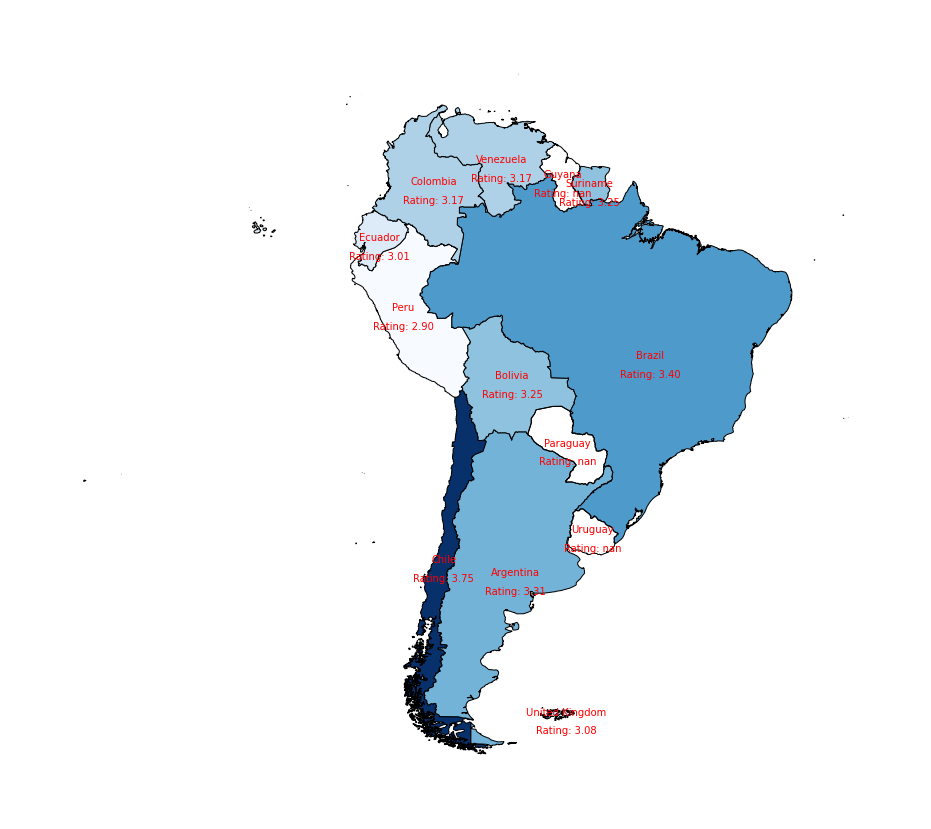

In [0]:
# Plot 
gplt.choropleth(plot_data, hue = 'Rating', cmap = 'Blues', figsize = (30,15))

# Add data label to the map
plot_data['coords'] = plot_data['geometry'].apply(lambda x: x.representative_point().coords[:])
plot_data['coords'] = [coords[0] for coords in plot_data['coords']]

for _, data in plot_data.iterrows():

  plt.text(x = data['coords'][0], y = data['coords'][1], 
           s = data['country'], ha = 'center', color = 'red')
  plt.text(x = data['coords'][0], y = data['coords'][1] - 2, 
          s = f"Rating: {data['Rating']:.2f}", ha = 'center', color = 'red')
